In [14]:
#@title Importations

import random
import matplotlib.pyplot as plt
from collections import deque
from sortedcontainers import SortedSet
import time
import timeit

In [15]:
#@title ABF

class NoeudBinaire:

    def __init__(self, element, gauche=None, droite=None):
        self._element = element
        self._gauche = gauche
        self._droite = droite

    def get_element(self):
        return self._element

    def set_element(self, element):
        self._element = element

    def get_gauche(self):
        return self._gauche

    def set_gauche(self, noeud) -> None:
        self._gauche = noeud

    def get_droite(self):
        return self._droite

    def set_droite(self, noeud) -> None:
        self._droite = noeud

    def get_degre(self) -> int:
        nb_fils = 0
        if self._gauche:
            nb_fils += 1
        if self._droite:
            nb_fils += 1
        return nb_fils

class ABF:
    def __init__(self):
        self._racine = None

    def __iter__(self):
        # Retourne un itérateur sur les valeurs de l’arbre
        yield from self._parcours_infixe(self._racine)

    def _parcours_infixe(self, noeud:NoeudBinaire):
        if noeud != None:
            yield from self._parcours_infixe(noeud.get_gauche())
            yield noeud.get_element()
            yield from self._parcours_infixe(noeud.get_droite())

    def get_racine(self) -> NoeudBinaire:
        return self._racine

    # Pour exercice 7.1
    # Version itérative
    def inserer(self, valeur) -> None:
        nouveauNoeud = NoeudBinaire(valeur)
        if self._racine == None:
            self._racine = nouveauNoeud
        else:
            courant = self._racine
            place = False
            while not place:
                if valeur < courant.get_element():
                    if courant.get_gauche() == None:
                        courant.set_gauche(nouveauNoeud)
                        place = True
                    else:
                        courant = courant.get_gauche()
                else:
                    if courant.get_droite() == None:
                        courant.set_droite(nouveauNoeud)
                        place = True
                    else:
                        courant = courant.get_droite()

    # Pour exercice 7.2
    def __contains__(self, element):
        noeud = self._racine
        while noeud != None:
            if element == noeud.get_element():
                return True
            elif element < noeud.get_element():
                noeud = noeud.get_gauche()
            else:
                noeud = noeud.get_droite()
        return False

    # Pour exercice 7.3
    def supprimer(self, element):

        def _trouver_prochaine_valeur(noeud:NoeudBinaire):
            curseur = noeud.get_droite()
            while curseur.get_gauche() != None:
                curseur = curseur.get_gauche()
            return curseur.get_element()

        def _supprimer_successeur(noeud:NoeudBinaire) -> NoeudBinaire:
            if noeud.get_gauche() != None:
                noeud.set_gauche(_supprimer_successeur(noeud.get_gauche()))
                return noeud
            else:
                return _enlever_noeud(noeud)

        def _enlever_noeud(noeud:NoeudBinaire) -> NoeudBinaire:
            if noeud.get_degre() == 0:
                return None
            elif noeud.get_degre() == 1:
                if noeud.get_gauche() != None:
                    return noeud.get_gauche()
                else:
                    return noeud.get_droite()
            else:
                valeur = _trouver_prochaine_valeur(noeud)
                noeud.set_element(valeur)
                noeud.set_droite(_supprimer_successeur(noeud.get_droite()))
                return noeud

        def _suppression(noeud:NoeudBinaire):

            if noeud != None:
                if noeud.get_element() == element:
                    noeud =  _enlever_noeud(noeud)
                elif element < noeud.get_element():
                    noeud.set_gauche(_suppression(noeud.get_gauche()))
                else:
                    noeud.set_droite(_suppression(noeud.get_droite()))
            else:
                raise RuntimeError    # Le noeud n'est pas dans l'arbre
            return noeud

        self._racine = _suppression(self._racine)


    # Pour exercice 7.4
    def equilibrer(self) -> None:

        def _reconstruire(debut:int, fin:int) -> NoeudBinaire:
            if debut > fin:
                return None
            else:
                milieu = (debut + fin) // 2
                noeud = noeuds[milieu]
                noeud.set_gauche(_reconstruire(debut, milieu-1))
                noeud.set_droite(_reconstruire(milieu+1, fin))
                return noeud

        noeuds = [NoeudBinaire(valeur) for valeur in self]
        self._racine = _reconstruire(0, len(noeuds) -1)


    def get_hauteur(self) -> int:
        def _calculer_hauteur(noeud:NoeudBinaire) -> int:
            hauteur = -1
            if noeud != None:
                hauteur_gauche = _calculer_hauteur(noeud.get_gauche())
                hauteur_droite = _calculer_hauteur(noeud.get_droite())
                hauteur = max(hauteur_gauche, hauteur_droite) + 1
            return hauteur
        return _calculer_hauteur(self._racine)#   # Si l'arbre est vide, on retourne -1

    def __len__(self) -> int:
        def _compter(noeud:NoeudBinaire) -> int:
            nombre = 0
            if noeud != None:
                nombre_gauche = _compter(noeud.get_gauche())
                nombre_droite = _compter(noeud.get_droite())
                nombre = nombre_gauche + nombre_droite + 1
            return nombre
        return _compter(self._racine)



In [16]:
#@title Fonctions

import matplotlib.pyplot as plt

# Travail collaboratif avec ChatGPT
def dessiner_arbre(abf, rayon_noeud=0.3):
    offset = rayon_noeud * 2 + rayon_noeud / 2
    liste_noeuds = []

    def _creer_liste_noeuds(noeud, indice):
        while indice >= len(liste_noeuds):
            liste_noeuds.append(None)
        if noeud is not None:
            liste_noeuds[indice] = noeud
            _creer_liste_noeuds(noeud.get_gauche(), 2*indice + 1)
            _creer_liste_noeuds(noeud.get_droite(), 2*indice + 2)

    def positions_noeuds_sur_largeur(largeur_totale, rayon_noeud, nb_noeuds, y=0):
        if nb_noeuds <= 0:
            return []
        cellule = largeur_totale / nb_noeuds
        positions = []
        for i in range(nb_noeuds):
            x = cellule * i + cellule / 2
            positions.append((x, y))
        return positions

    def dessiner_niveau(niveau, rayon_noeud, largeur):
        nombre_noeuds = 2 ** niveau
        positions = positions_noeuds_sur_largeur(largeur, rayon_noeud, nombre_noeuds, -niveau * offset)
        liste_active = liste_noeuds[2**niveau-1:2**(niveau+1)-1]

        # Dessin des arêtes AVANT les noeuds
        if niveau > 0:
            positions_parent = positions_noeuds_sur_largeur(largeur, rayon_noeud, 2**(niveau-1), -(niveau-1) * offset)
            for i, noeud in enumerate(liste_active):
                if noeud is not None:
                    parent_index = (i // 2)
                    parent = liste_noeuds[2**(niveau-1)-1 + parent_index]
                    if parent is not None:
                        # Coordonnées ajustées pour que les lignes s'arrêtent sur le bord des cercles
                        x1, y1 = positions_parent[parent_index]
                        x2, y2 = positions[i]
                        dx = x2 - x1
                        dy = y2 - y1
                        dist = (dx**2 + dy**2)**0.5
                        if dist > 0:
                            ratio = rayon_noeud / dist
                            x1 += dx * ratio
                            y1 += dy * ratio
                            x2 -= dx * ratio
                            y2 -= dy * ratio
                        ax.plot([x1, x2], [y1, y2], color="black", lw=1)

        # Dessin des noeuds
        for (x, y), noeud in zip(positions, liste_active):
            if noeud:
                cercle = plt.Circle((x, y), rayon_noeud, color='white', ec='black', lw=1.2)
                ax.add_patch(cercle)
                ax.text(x, y, noeud.get_element(), ha='center', va='center', fontsize=10)

        ax.set_xlim(0, largeur)
        ax.set_ylim(- (hauteur + 1) * offset, rayon_noeud*2)

    racine = abf.get_racine()
    hauteur = abf.get_hauteur()
    taille_dernier_niveau = 2 ** hauteur
    largeur_requise = (rayon_noeud * 2 +  rayon_noeud / 3) * taille_dernier_niveau

    fig, ax = plt.subplots(figsize=(largeur_requise, max(2, hauteur*2)))
    ax.set_aspect('equal')
    ax.axis('off')

    _creer_liste_noeuds(abf.get_racine(), 0)

    for i in range(hauteur + 1):
        dessiner_niveau(i, rayon_noeud, largeur_requise)

    plt.show()



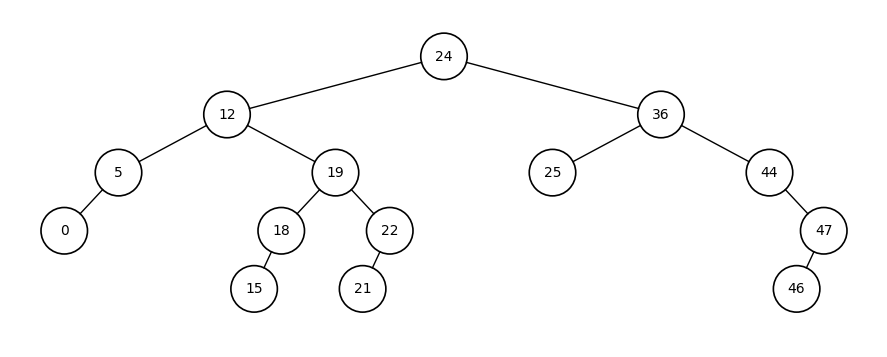

0 5 12 15 18 19 21 22 24 25 36 44 46 47 


In [17]:
#@title Exercice 7.1

# Il faut faire fonctionner l'insertion des éléments suivants:
un_arbre = ABF()
valeurs = [24, 12, 5, 36, 19, 22, 21, 18, 15, 44, 47, 46, 25, 0]
for valeur in valeurs:
    un_arbre.inserer(valeur)
dessiner_arbre(un_arbre)
for valeur in un_arbre:
    print(valeur, end= " ")
print()


In [18]:
#­­@title Exercice 7.2

# À partir l'arbre de la question 7.1, faites ces recherches
print(12 in un_arbre)
print(23 in un_arbre)
print(50 in un_arbre)
print(28 in un_arbre)


True
False
False
False


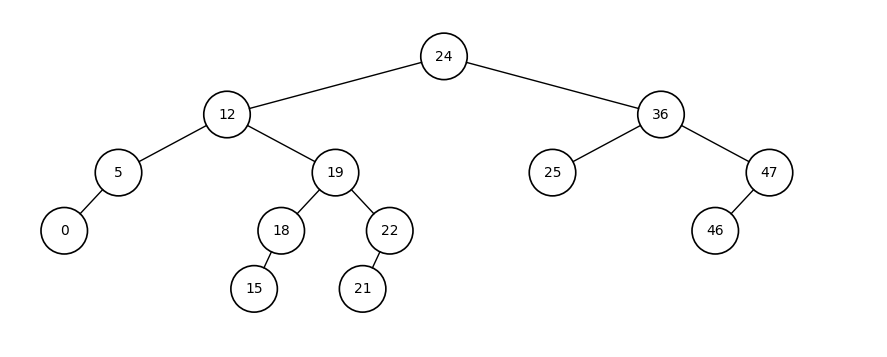

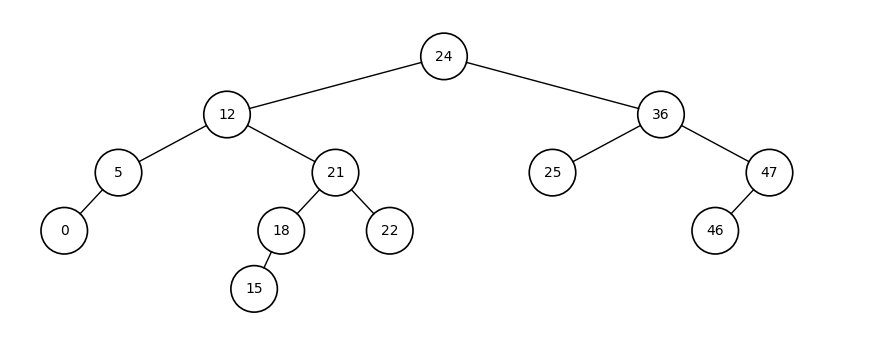

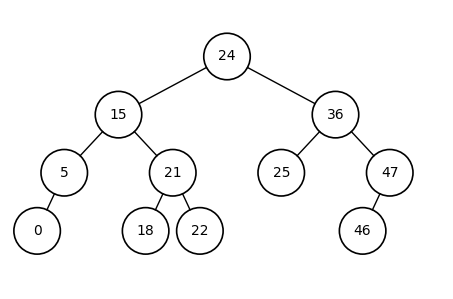

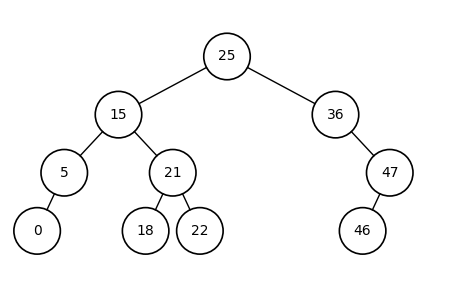

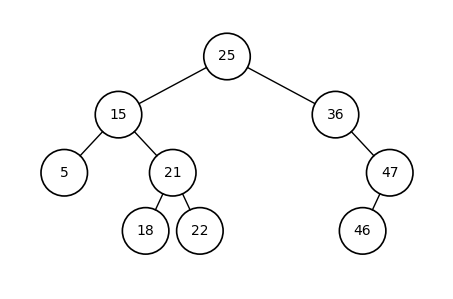

Élément 58 est absent


In [19]:
#@title Exercice 7.3

suppressions = [44, 19, 12, 24, 0, 58]

for valeur in suppressions:
    try:
        un_arbre.supprimer(valeur)
        dessiner_arbre(un_arbre)
    except RuntimeError:
        print(f"Élément {valeur} est absent")



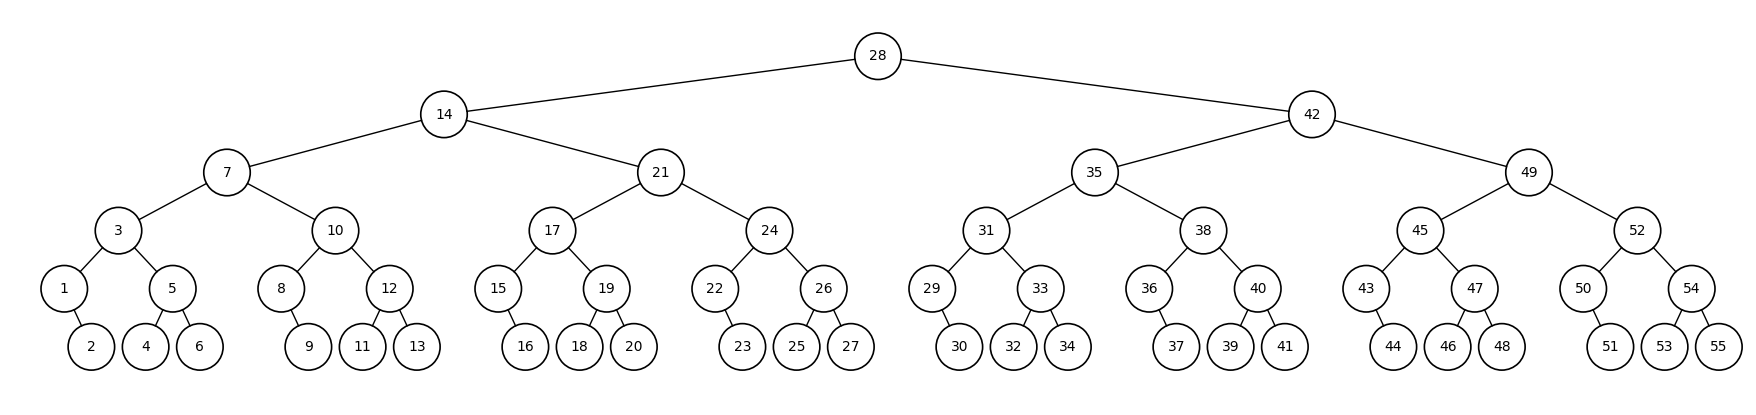

In [20]:
#@title Exercice 7.4

un_arbre = ABF()
for i in range(1, 56):
    un_arbre.inserer(i)

un_arbre.equilibrer()
dessiner_arbre(un_arbre)


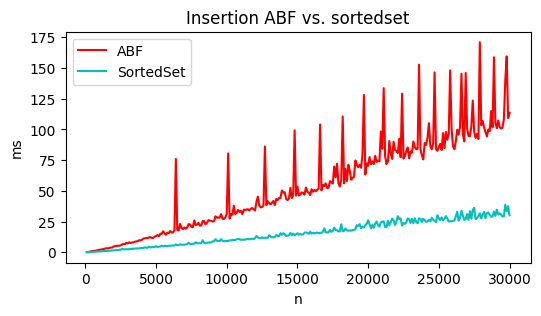

In [ ]:
#@title Exercice 7.5

NOMBRE_RECHERCHES = 1000

def tableau_aleatoire(n):
    liste_valeurs = [x*2 for x in range(0, n)]
    random.shuffle(liste_valeurs)
    return liste_valeurs

def recherche_aleatoire(n):
    recherches = []
    for i in range(NOMBRE_RECHERCHES):
        valeur = random.uniform(0, 1)
        valeur_base = random.randint(0, n) * 2
        if valeur <= 0.2:
            recherches.append(valeur_base + 1)     # On chreche une valeur impaire
        else:
            recherches.append(valeur_base)

    return recherches

def tester_recherche_arbre(arbre_binaire, recherches):
    for valeur in recherches:
        present = valeur in arbre_binaire
#        present = arbre_binaire.contient(valeur)

def tester_recherche_sortedset(ensemble:SortedSet, recherches):
    for valeur in recherches:
        present = valeur in ensemble

x = []
y_inserer_abf = []
y_inserer_set = []
y_arbre_binaire = []
y_sortedset = []

for n in range(100, 30100, 100):
    x.append(n)
    insertions = tableau_aleatoire(n)
    recherches = recherche_aleatoire(n)

    arbre_binaire = ABF()
    sorted_set = SortedSet()

    avant = time.perf_counter()
    for valeur in insertions:
        arbre_binaire.inserer(valeur)
    apres = time.perf_counter()
    y_inserer_abf.append((apres-avant) * 1000)

    avant = time.perf_counter()
    for valeur in insertions:
        sorted_set.add(valeur)
    apres = time.perf_counter()
    y_inserer_set.append((apres-avant) * 1000)

    temps = timeit.repeat(lambda: tester_recherche_arbre(arbre_binaire, recherches), number=1, repeat=5)
    y_arbre_binaire.append(sum(temps)/len(temps) * 1000)

    temps = timeit.repeat(lambda: tester_recherche_sortedset(sorted_set, recherches), number=1, repeat=5)
    y_sortedset.append(sum(temps)/len(temps) * 1000)

plt.figure(figsize=(6, 3))
plt.title("Insertion ABF vs. sortedset")
plt.xlabel("n")
plt.ylabel("ms")
plt.plot(x, y_inserer_abf, "-r", label="ABF")
plt.plot(x, y_inserer_set, "-c", label="SortedSet")
plt.legend()
plt.show()

plt.figure(figsize=(6, 3))
plt.title("Recherche ABF vs. sortedset")
plt.xlabel("n")
plt.ylabel("ms")
plt.plot(x, y_arbre_binaire, "-r", label="ABF")
plt.plot(x, y_sortedset, "-c", label="SortedSet")
plt.legend()
plt.show()

